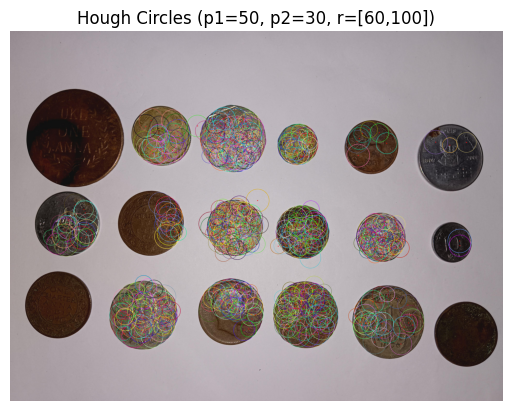

Number of coins detected: 629


In [5]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def remove_overlapping_circles(circles, distance_threshold=15):
    """
    Removes overlapping circles by ensuring that the distance between
    any two circle centers is greater than `distance_threshold`.
    If two circles overlap, we keep the one with the larger radius.
    """
    if len(circles) == 0:
        return circles

    final_circles = []
    for c in circles:
        x1, y1, r1 = c
        keep = True
        for fc in final_circles:
            x2, y2, r2 = fc
            dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
            if dist < distance_threshold:
                # They overlap; keep the circle with the larger radius
                if r1 > r2:
                    # Replace the old circle
                    final_circles.remove(fc)
                    final_circles.append(c)
                keep = False
                break
        if keep:
            final_circles.append(c)

    return final_circles

def detect_coins(image_path, param1, param2, minRadius, maxRadius,
                 distance_threshold=15, show=False):
    """
    Detects coins using HoughCircles with given hyperparameters,
    removes overlapping circles, and optionally displays the result.
    Returns the number of coins detected.
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image from:", image_path)
        return 0

    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Hough Circle detection
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=30,      # You can adjust this based on coin spacing
        param1=param1,   # Canny high threshold
        param2=param2,   # Accumulator threshold for center detection
        minRadius=minRadius,
        maxRadius=maxRadius
    )

    # If no circles found, return 0
    if circles is None or len(circles) == 0:
        if show:
            print("No circles detected with these parameters.")
        return 0

    # Convert circles to integer format
    circles = np.round(circles[0, :]).astype("int")

    # Remove overlapping circles
    circles = remove_overlapping_circles(circles, distance_threshold=distance_threshold)

    # Draw circles in random colors if show=True
    if show:
        for (x, y, r) in circles:
            color = (
                random.randint(0, 255),
                random.randint(0, 255),
                random.randint(0, 255)
            )
            cv2.circle(output, (x, y), r, color, 2)  # Draw circle boundary
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Draw center point

        # Convert the output image from BGR to RGB for correct matplotlib display.
        output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        plt.imshow(output_rgb)
        plt.title(f"Hough Circles (p1={param1}, p2={param2}, r=[{minRadius},{maxRadius}])")
        plt.axis('off')
        plt.show()

    return len(circles)


if __name__ == "__main__":
    image_path = "1.jpg"  # Replace with your image path
    num_coins = detect_coins(image_path, param1=50, param2=30, minRadius=60, maxRadius=100, distance_threshold=18, show=True)
    print("Number of coins detected:", num_coins)


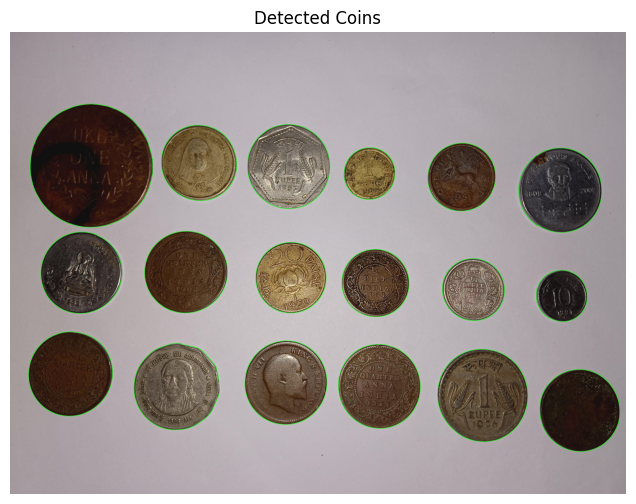

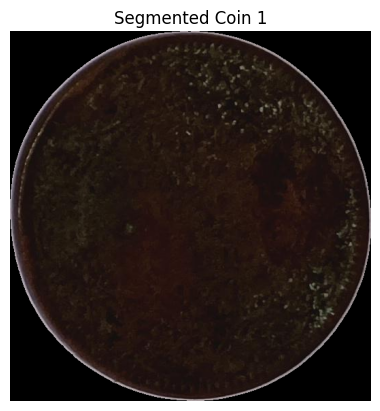

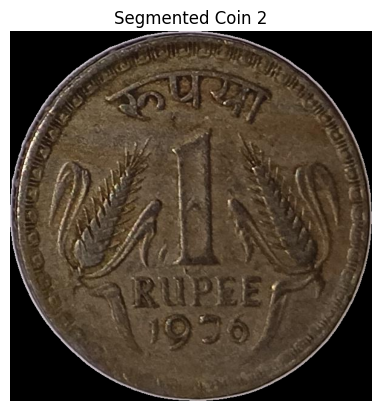

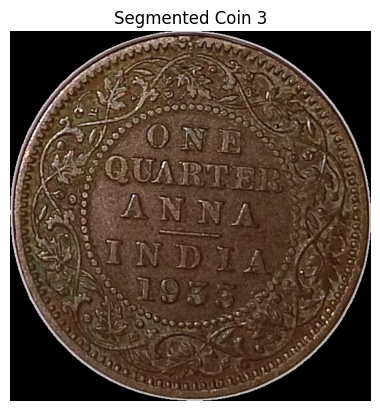

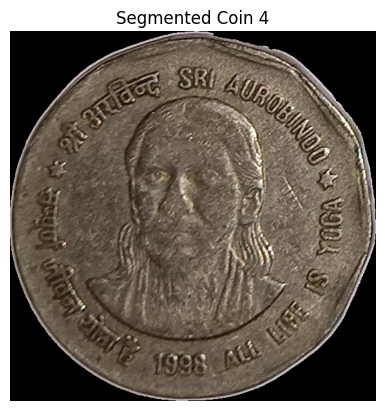

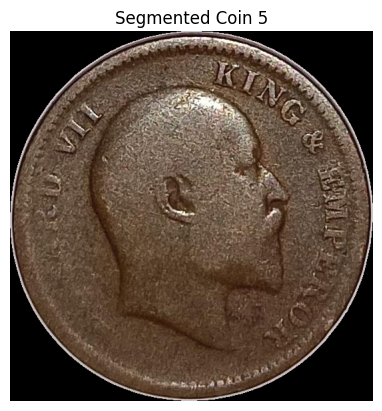

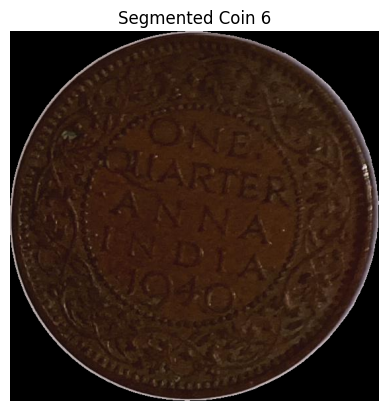

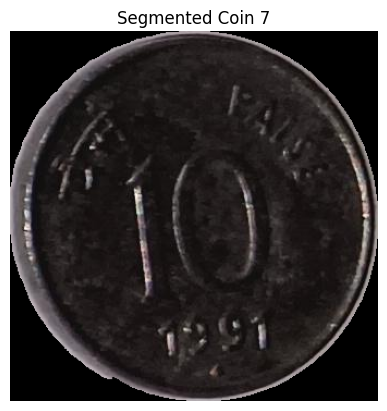

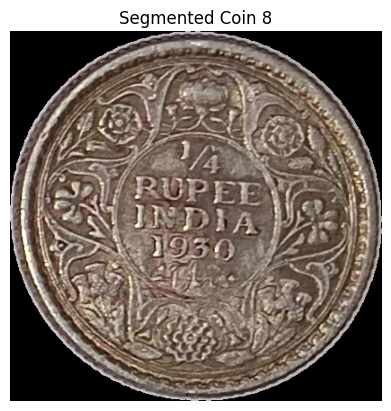

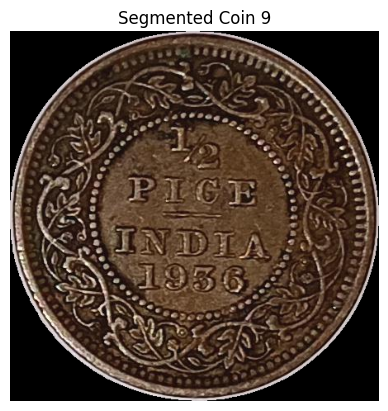

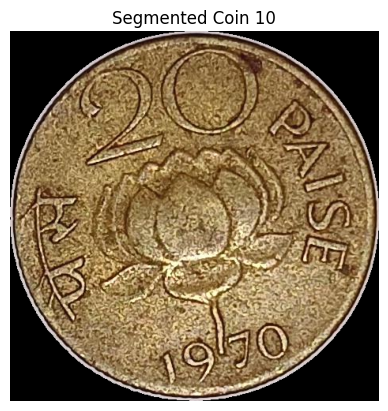

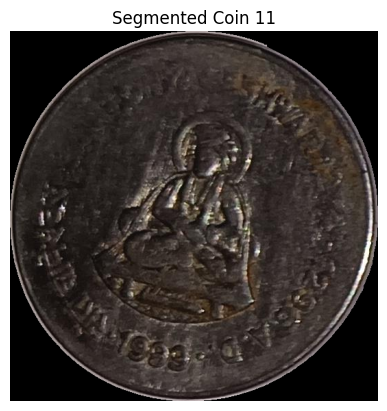

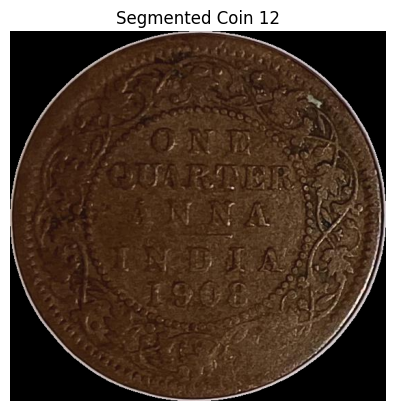

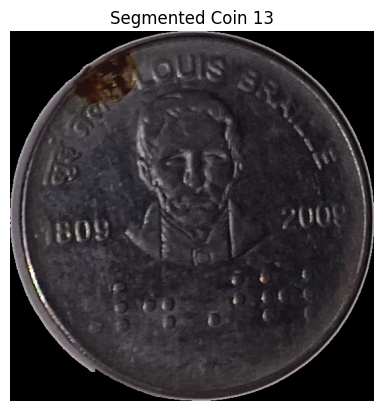

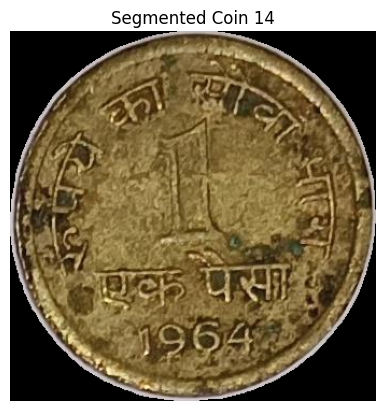

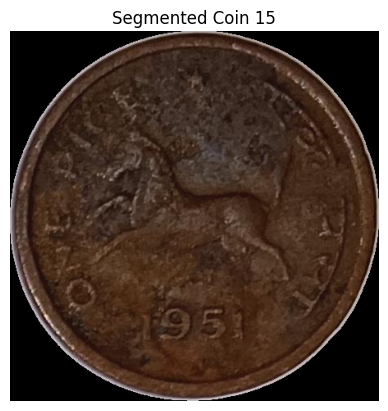

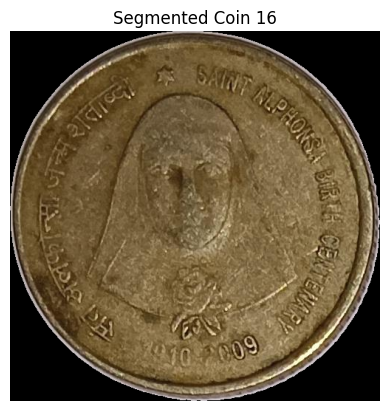

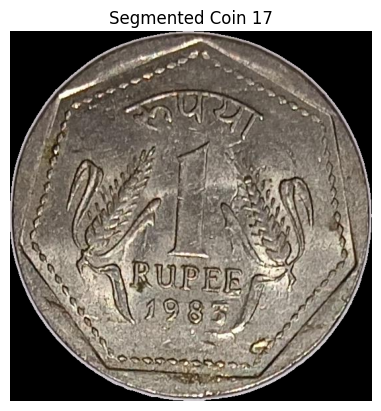

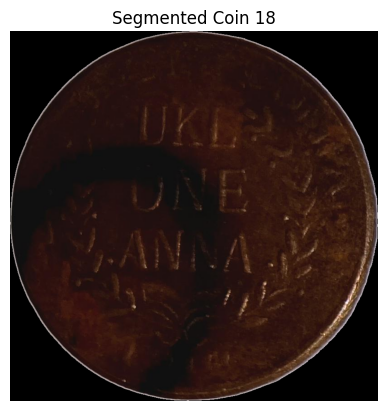

Total number of coins: 18


18

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_count_coins(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return
    original = image.copy()

    # Preprocessing: Convert to grayscale and blur
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (9, 9), 2)

    # Edge detection using Canny, then dilate edges
    edges = cv2.Canny(gray, 50, 150)
    edges = cv2.dilate(edges, None, iterations=2)

    # Find contours from the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by circularity and area to find coin-like shapes
    min_area = 500  # Adjust based on your image
    coins = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < min_area:
            continue
        perimeter = cv2.arcLength(cnt, True)
        if perimeter == 0:
            continue
        # Calculate circularity (ideal circle ~1)
        circularity = (4 * np.pi * area) / (perimeter ** 2)
        if circularity > 0.7:
            coins.append(cnt)

    # Part a: Visualize detected coins by drawing contours on the original image
    detected_image = original.copy()
    cv2.drawContours(detected_image, coins, -1, (0, 255, 0), 2)

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Coins')
    plt.axis('off')
    plt.show()

    # Part b: Segment each coin and display them individually
    for idx, cnt in enumerate(coins):
        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [cnt], -1, 255, -1)
        segmented = cv2.bitwise_and(original, original, mask=mask)
        x, y, w, h = cv2.boundingRect(cnt)
        cropped = segmented[y:y+h, x:x+w]

        plt.figure()
        plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
        plt.title(f'Segmented Coin {idx + 1}')
        plt.axis('off')
        plt.show()

    cv2.destroyAllWindows()

    # Part c: Count coins and print the total count
    count = len(coins)
    print(f'Total number of coins: {count}')
    return count

# Example usage
detect_and_count_coins('1.jpg')


In [ ]:
import cv2
import numpy as np

def detect_segment_and_count_coins(image_path):

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return 0

    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    blurred = cv2.GaussianBlur(gray, (9, 9), 2)


    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                               param1=50, param2=30, minRadius=10, maxRadius=100)

    if circles is None:
        print("No coins detected.")
        return 0


    if circles.ndim == 3:
        circles = np.round(circles[0, :]).astype("int")
    else:
        circles = np.round(circles).astype("int")

    total_coins = len(circles)
    segmented_coins = []

    for (x, y, r) in circles:

        cv2.circle(output, (x, y), r, (0, 255, 0), 2)
        cv2.circle(output, (x, y), 2, (0, 0, 255), 3)


        mask = np.zeros_like(gray)
        cv2.circle(mask, (x, y), r, 255, -1)
        segmented = cv2.bitwise_and(image, image, mask=mask)


        y1, y2 = max(0, y - r), min(image.shape[0], y + r)
        x1, x2 = max(0, x - r), min(image.shape[1], x + r)
        segmented_cropped = segmented[y1:y2, x1:x2]


        if segmented_cropped.size != 0:
            segmented_coins.append(segmented_cropped)


    plt.imshow('Detected Coins', output)



    for idx, coin in enumerate(segmented_coins):
        window_name = f'Segmented Coin {idx + 1}'
        plt.imshow(window_name, coin)



    print(f"Total number of coins detected: {total_coins}")
    return total_coins


detect_segment_and_count_coins('1.jpg')


In [2]:
import cv2
import numpy as np
import random

def remove_overlapping_circles(circles, distance_threshold=15):
    if len(circles) == 0:
        return circles
    final_circles = []
    for c in circles:
        x1, y1, r1 = c
        keep = True
        for fc in final_circles:
            x2, y2, r2 = fc
            dist = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
            if dist < distance_threshold:
                if r1 > r2:
                    final_circles.remove(fc)
                    final_circles.append(c)
                keep = False
                break
        if keep:
            final_circles.append(c)
    return final_circles

def detect_coins(image_path, param1, param2, minRadius, maxRadius, distance_threshold=15, show=False):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image from:", image_path)
        return 0
    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    edges = cv2.Canny(blurred, param1 / 2, param1)
    circles = cv2.HoughCircles(
        edges,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=30,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius
    )
    if circles is None or len(circles) == 0:
        if show:
            print("No circles detected with these parameters.")
        return 0
    circles = np.round(circles[0, :]).astype("int")
    circles = remove_overlapping_circles(circles, distance_threshold=distance_threshold)
    if show:
        for (x, y, r) in circles:
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            cv2.circle(output, (x, y), r, color, 2)
            cv2.circle(output, (x, y), 2, (0, 0, 255), 3)
        window_name = f"Hough Circles (p1={param1}, p2={param2}, r=[{minRadius},{maxRadius}])"
        while True:
            key = cv2.waitKey(1)
            if (cv2.getWindowProperty("Edge Detected Image", cv2.WND_PROP_VISIBLE) < 1 or
                cv2.getWindowProperty(window_name, cv2.WND_PROP_VISIBLE) < 1):
                break
            if key != -1:
                break
        cv2.destroyAllWindows()
    return len(circles)

if __name__ == "__main__":
    image_path = "1.jpg"
    num_coins = detect_coins(image_path, param1=50, param2=30, minRadius=25, maxRadius=40, distance_threshold=12, show=True)
    print("Number of coins detected:", num_coins)


error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window_QT.cpp:179: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvGetPropVisible_QT'


In [ ]:
import pandas as pd
data = pd.read_csv('res.csv')

In [ ]:
data.head()

param1  param2  minRadius  maxRadius  distance_threshold  coin_count
0      50      20         10         40                  12         356
1      50      20         10         40                  13         356
2      50      20         10         40                  14         356
3      50      20         10         40                  15         356
4      50      20         10         40                  16         356

In [ ]:
new_data =  data[ (data['coin_count']>16) &  (data['coin_count']<20) ]
new_data.shape

(81, 6)

In [ ]:
data3=data2[data2['coin_count']==18]


NameError: name 'data2' is not defined